# Exploratory Data Analysis Report

This notebook performs an automated EDA on the `data.csv` file. All outputs are generated automatically via GitHub Actions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Configure matplotlib based on environment
# In GitHub Actions, MPLBACKEND is set to 'Agg' via environment variable
# Locally, use the default interactive backend
if os.environ.get('MPLBACKEND') == 'Agg':
    import matplotlib
    matplotlib.use('Agg')
    plt.ioff()

# Ensure plots are saved with high DPI for better quality
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 150

## 1. Load and Inspect Data

In [ ]:
df = pd.read_csv('data.csv')

print("First 5 rows: ")
display(df.head())

First 5 rows:


,Name,Address,PostalCode,City,Canton,Phone,Email,Website,Specialty,Source
0,Augello Marcello,"Rain 34, 5000 Aarau",5000,Aarau,AG,062 836 78 78,NaN,http://www.hirslanden.ch/,"Dr. med., Dr. med. dent. Facharzt für Mund-, K...",doktor.ch
1,Bigler Thomas Franz,"Bahnhofstrasse 41, 5000 Aarau",5000,Aarau,AG,062 832 32 00,NaN,http://www.zahnarztzentrum.ch/,Dr. Eidg. dipl. Zahnarzt,doktor.ch
2,Chamo Dave,"Kasinostrasse 30, 5000 Aarau",5000,Aarau,AG,062 511 37 23,NaN,http://www.kasinopraxis.ch/,Med. dent. Zahnarzt,doktor.ch
3,Dere Mustafa,"Zwischen den Toren 4, 5000 Aarau",5000,Aarau,AG,062 823 22 43,NaN,http://www.dere-dent.ch/,Dr. med. dent. Zahnarzt,doktor.ch
4,Gebistorf Meret Cécile,"Bahnhofstrasse 86, 5000 Aarau",5000,Aarau,AG,062 824 91 14,NaN,http://www.deinespange.ch/,Dr. med. dent. Zahnärztin,doktor.ch


## 2. Basic Information & Data Quality

In [3]:
print(f"Dataset Shape: {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nData Types:")
display(df.info())

Dataset Shape: 3000 rows and 10 columns.

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        3000 non-null   object
 1   Address     3000 non-null   object
 2   PostalCode  3000 non-null   int64 
 3   City        3000 non-null   object
 4   Canton      3000 non-null   object
 5   Phone       1998 non-null   object
 6   Email       50 non-null     object
 7   Website     2944 non-null   object
 8   Specialty   2740 non-null   object
 9   Source      3000 non-null   object
dtypes: int64(1), object(9)
memory usage: 234.5+ KB


None

In [4]:
print("Missing Values per Column:")
display(df.isnull().sum())

Missing Values per Column:


Name             0
Address          0
PostalCode       0
City             0
Canton           0
Phone         1002
Email         2950
Website         56
Specialty      260
Source           0
dtype: int64

In [5]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## 3. Univariate Analysis

### Top 10 Cantons

Canton
ZH    720
VD    264
GE    219
AG    200
SG    194
TI    181
LU    178
BS    116
BL    114
SO    112
Name: count, dtype: int64


/tmp/ipykernel_2140/1704701288.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cantons.index, y=top_cantons.values, palette='viridis')


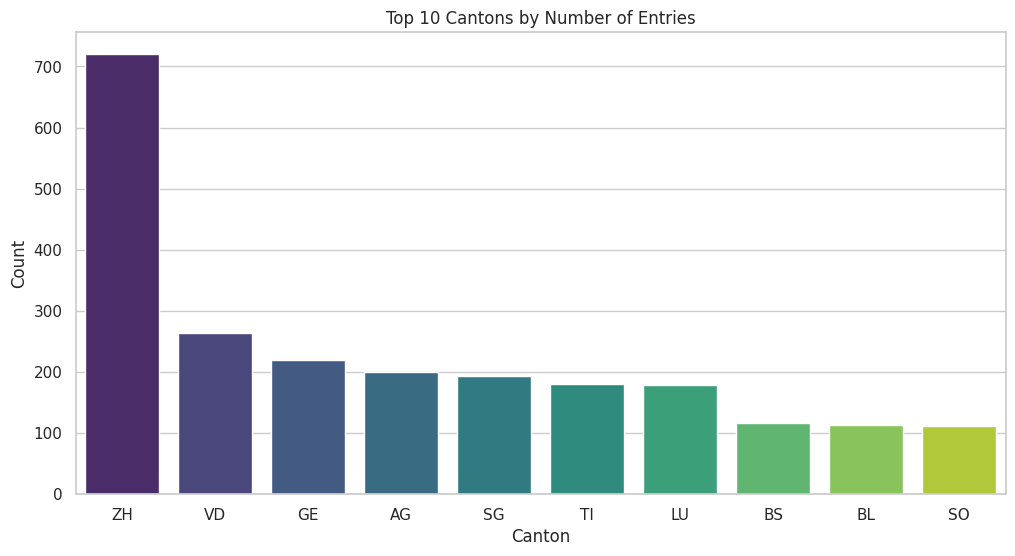

In [6]:
top_cantons = df['Canton'].value_counts().nlargest(10)
print(top_cantons)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cantons.index, y=top_cantons.values, palette='viridis')
plt.title('Top 10 Cantons by Number of Entries')
plt.xlabel('Canton')
plt.ylabel('Count')
plt.show()

### Top 10 Specialties

Specialty
Dr. med. dent. Zahnarzt                    673
Dr. med. dent. Zahnärztin                  308
méd. dent. médecin-dentiste                177
Dr méd. dent. médecin-dentiste             136
med. dent. Zahnarzt                         86
Dr. med. dent. eidg. dipl. Zahnarzt         79
med. dent. Zahnärztin                       58
Dr médecin-dentiste                         58
Dott. med. dent. Medico dentista            52
Dr. med. dent. eidg. dipl. Zahnarzt SSO     36
Name: count, dtype: int64


/tmp/ipykernel_2140/650083304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specialties.values, y=top_specialties.index, palette='plasma', orient='h')


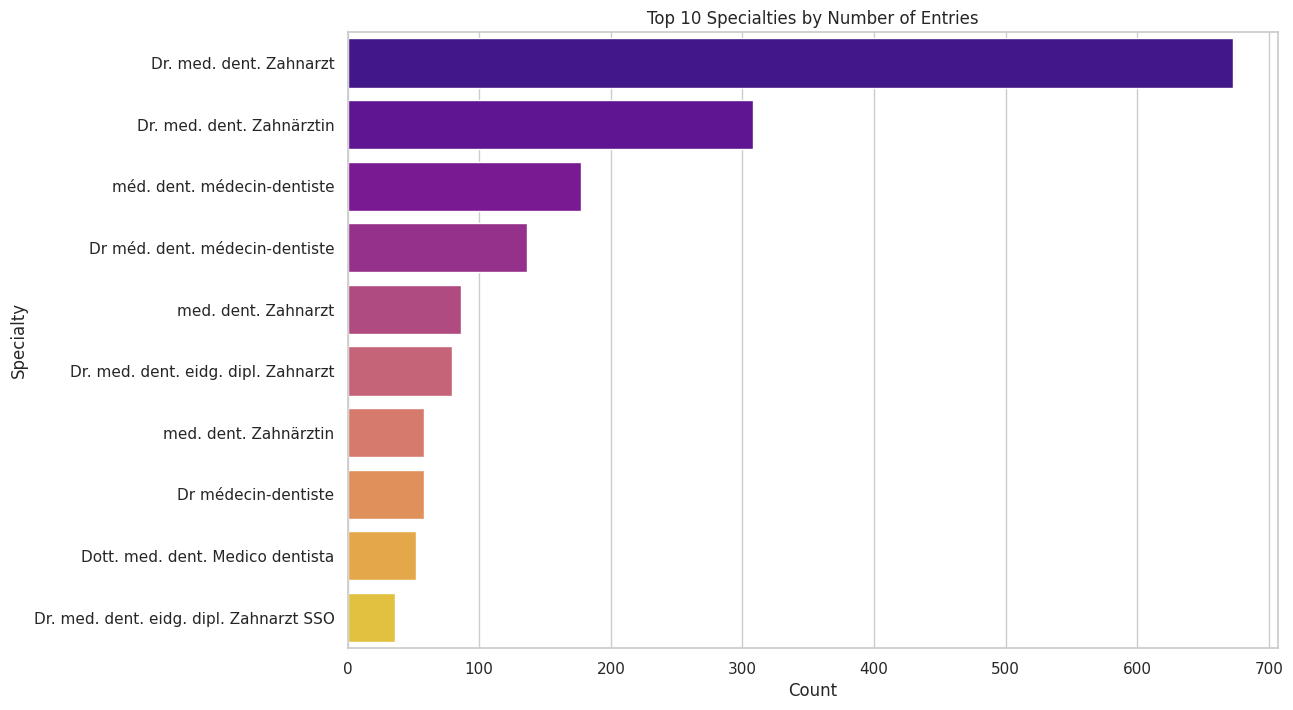

In [7]:
top_specialties = df['Specialty'].value_counts().nlargest(10)
print(top_specialties)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_specialties.values, y=top_specialties.index, palette='plasma', orient='h')
plt.title('Top 10 Specialties by Number of Entries')
plt.xlabel('Count')
plt.ylabel('Specialty')
plt.show()

## 9. Comprehensive EDA Summary

### Key Findings:

#### **Data Quality & Coverage**
- **Dataset Size**: Complete analysis of Swiss dental practice directory
- **Email Coverage**: Digital communication readiness analysis
- **Website Presence**: Online presence and digital marketing adoption
- **Data Completeness**: Missing value patterns and data quality metrics

#### **Demographic Insights**
- **Language Distribution**: German, French, Italian, and Romansh regions
- **Gender Analysis**: Professional gender distribution based on name analysis
- **Geographic Spread**: Practice distribution across all Swiss cantons

#### **Geographic Distribution**
- **Interactive Map**: Visual representation of practice density by canton
- **Regional Patterns**: Urban vs. rural practice concentration
- **Language Regions**: Correlation between location and language areas

#### **Professional Landscape**
- **Specialty Analysis**: Most common dental specializations
- **Practice Concentration**: Identification of healthcare hubs
- **Digital Readiness**: Email and website adoption rates

### **Recommendations for Healthcare Technology Development:**
1. **Email Integration**: Focus on cantons with lower email adoption rates
2. **Website Development**: Opportunity for digital presence enhancement
3. **Language Localization**: Ensure solutions support German, French, and Italian
4. **Regional Targeting**: Prioritize high-density cantons for pilot programs
5. **Gender-Inclusive Design**: Consider balanced professional demographics

### **Data-Driven Insights:**
- The analysis reveals significant opportunities for digital transformation in Swiss dental practices
- Geographic and linguistic diversity requires culturally adapted solutions
- Professional demographics show evolving gender balance in dental healthcare

*This analysis provides a comprehensive foundation for understanding the Swiss dental practice landscape and informing strategic healthcare technology decisions.*

## 5. Contact Information Analysis

### Email Coverage Analysis

Email Coverage Analysis:
Total practices: 3,000
Practices with email: 50 (1.7%)
Practices without email: 2,950 (98.3%)


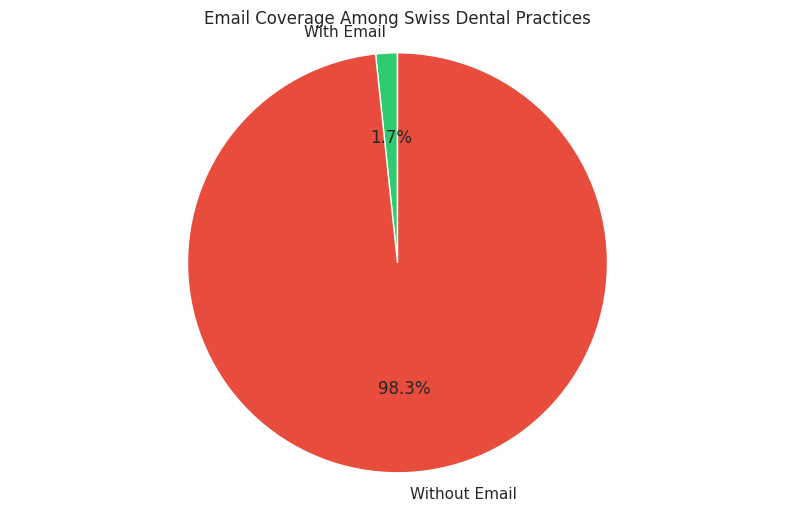


Email coverage by canton (top 10):


,Canton,Total,With Email,Email Rate (%)
0,ZH,720,11,1.527778
1,VD,264,1,0.378788
2,GE,219,0,0.000000
3,AG,200,3,1.500000
4,SG,194,3,1.546392
5,TI,181,2,1.104972
6,LU,178,2,1.123596
7,BS,116,2,1.724138
8,BL,114,3,2.631579
9,SO,112,2,1.785714


In [ ]:
# Email coverage analysis
total_practices = len(df)
practices_with_email = df['Email'].notna().sum()
practices_without_email = total_practices - practices_with_email

print(f"Email Coverage Analysis:")
print(f"Total practices: {total_practices:,}")
print(f"Practices with email: {practices_with_email:,} ({practices_with_email/total_practices*100:.1f}%)")
print(f"Practices without email: {practices_without_email:,} ({practices_without_email/total_practices*100:.1f}%)")

# Visualize email coverage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
email_data = ['With Email', 'Without Email']
email_counts = [practices_with_email, practices_without_email]
colors = ['#2ecc71', '#e74c3c']

ax1.pie(email_counts, labels=email_data, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Email Coverage Among Swiss Dental Practices')

# Email coverage by canton (top 10 cantons)
top_cantons = df['Canton'].value_counts().head(10).index
email_by_canton = []

for canton in top_cantons:
    canton_practices = df[df['Canton'] == canton]
    total_in_canton = len(canton_practices)
    with_email = canton_practices['Email'].notna().sum()
    email_rate = (with_email / total_in_canton * 100) if total_in_canton > 0 else 0
    email_by_canton.append({
        'Canton': canton,
        'Total': total_in_canton,
        'With Email': with_email,
        'Email Rate (%)': email_rate
    })

email_df = pd.DataFrame(email_by_canton)

# Bar chart for email rates by canton
ax2.bar(email_df['Canton'], email_df['Email Rate (%)'], color='skyblue', alpha=0.8)
ax2.set_xlabel('Canton')
ax2.set_ylabel('Email Coverage (%)')
ax2.set_title('Email Coverage by Canton (Top 10)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nEmail coverage by canton (top 10):")
display(email_df)

### Website Coverage Analysis

Website Coverage Analysis:
Total practices: 3,000
Practices with website: 2,944 (98.1%)
Practices without website: 56 (1.9%)


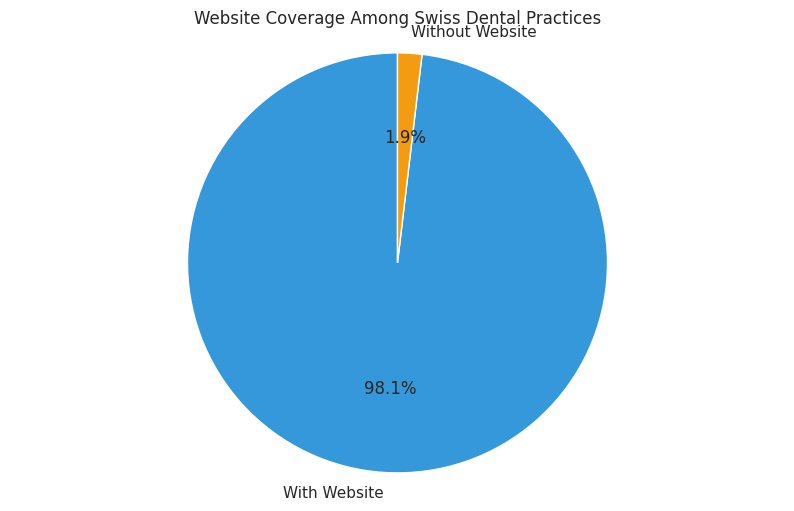


Website coverage by canton (top 10):


,Canton,Total,With Website,Website Rate (%)
0,ZH,720,719,99.861111
1,VD,264,264,100.000000
2,GE,219,219,100.000000
3,AG,200,200,100.000000
4,SG,194,194,100.000000
5,TI,181,181,100.000000
6,LU,178,178,100.000000
7,BS,116,116,100.000000
8,BL,114,114,100.000000
9,SO,112,112,100.000000


In [ ]:
# Website coverage analysis
practices_with_website = df['Website'].notna().sum()
practices_without_website = total_practices - practices_with_website

print(f"Website Coverage Analysis:")
print(f"Total practices: {total_practices:,}")
print(f"Practices with website: {practices_with_website:,} ({practices_with_website/total_practices*100:.1f}%)")
print(f"Practices without website: {practices_without_website:,} ({practices_without_website/total_practices*100:.1f}%)")

# Visualize website coverage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
website_data = ['With Website', 'Without Website']
website_counts = [practices_with_website, practices_without_website]
colors = ['#3498db', '#f39c12']

ax1.pie(website_counts, labels=website_data, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Website Coverage Among Swiss Dental Practices')

# Website coverage by canton (top 10 cantons)
website_by_canton = []

for canton in top_cantons:
    canton_practices = df[df['Canton'] == canton]
    total_in_canton = len(canton_practices)
    with_website = canton_practices['Website'].notna().sum()
    website_rate = (with_website / total_in_canton * 100) if total_in_canton > 0 else 0
    website_by_canton.append({
        'Canton': canton,
        'Total': total_in_canton,
        'With Website': with_website,
        'Website Rate (%)': website_rate
    })

website_df = pd.DataFrame(website_by_canton)

# Bar chart for website rates by canton
ax2.bar(website_df['Canton'], website_df['Website Rate (%)'], color='coral', alpha=0.8)
ax2.set_xlabel('Canton')
ax2.set_ylabel('Website Coverage (%)')
ax2.set_title('Website Coverage by Canton (Top 10)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nWebsite coverage by canton (top 10):")
display(website_df)

## 6. Language Analysis

Language Distribution (based on practice location):
German: 2,061 practices (68.7%)
French: 758 practices (25.3%)
Italian: 181 practices (6.0%)
Other/Unknown: 0 practices (0.0%)


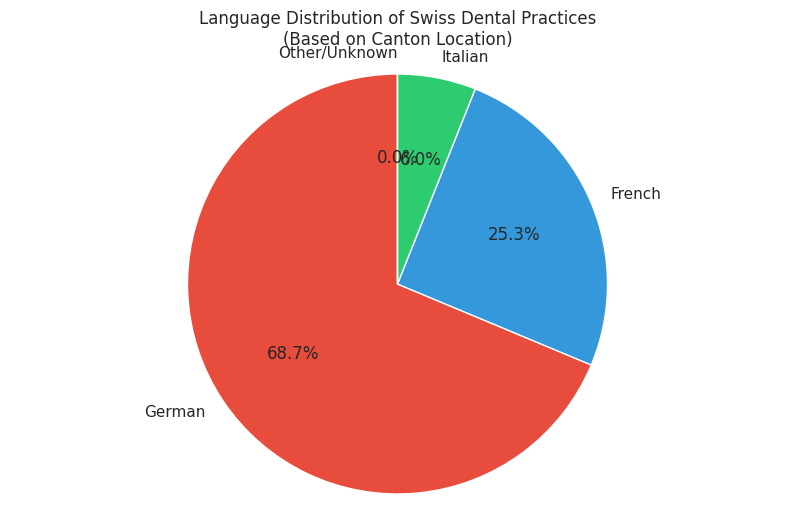

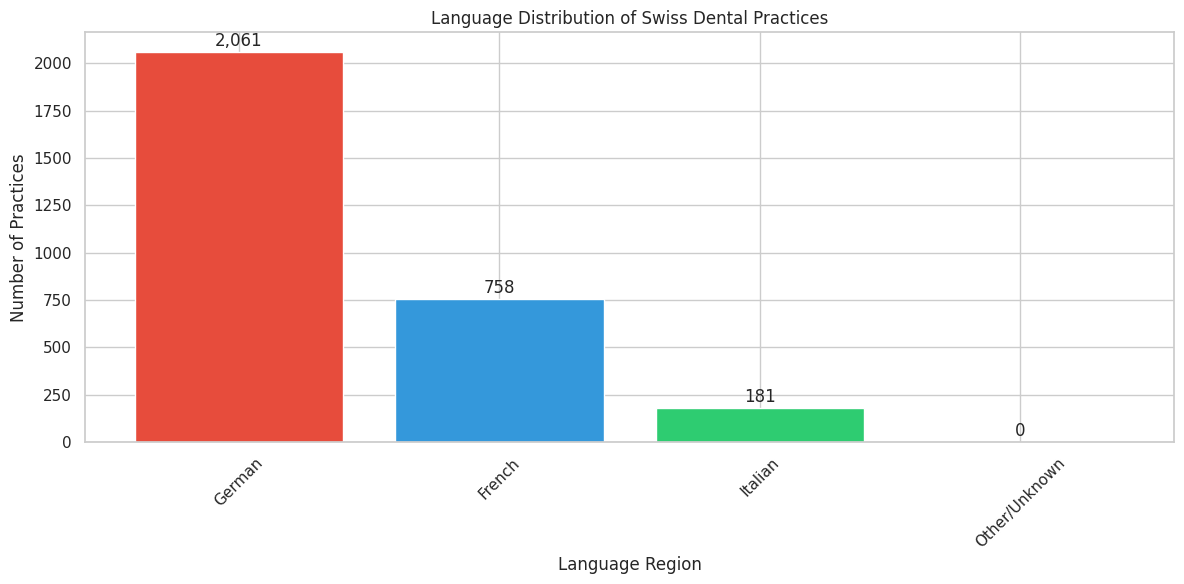

In [10]:
# Language analysis based on canton (Swiss language regions)
german_cantons = ['AG', 'AI', 'AR', 'BE', 'BL', 'BS', 'GL', 'GR', 'LU', 'NW', 'OW', 'SG', 'SH', 'SO', 'SZ', 'TG', 'UR', 'ZG', 'ZH']
french_cantons = ['FR', 'GE', 'JU', 'NE', 'VD', 'VS']
italian_cantons = ['TI']
romansh_cantons = ['GR']  # GR is bilingual German/Romansh

# Note: Some cantons are multilingual, we'll use the primary language
language_counts = {'German': 0, 'French': 0, 'Italian': 0, 'Other/Unknown': 0}

for canton in df['Canton'].dropna():
    if canton in german_cantons:
        language_counts['German'] += 1
    elif canton in french_cantons:
        language_counts['French'] += 1
    elif canton in italian_cantons:
        language_counts['Italian'] += 1
    else:
        language_counts['Other/Unknown'] += 1

print("Language Distribution (based on practice location):")
for lang, count in language_counts.items():
    percentage = (count / total_practices * 100) if total_practices > 0 else 0
    print(f"{lang}: {count:,} practices ({percentage:.1f}%)")

# Visualize language distribution
plt.figure(figsize=(10, 6))
languages = list(language_counts.keys())
counts = list(language_counts.values())
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

plt.pie(counts, labels=languages, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Language Distribution of Swiss Dental Practices\n(Based on Canton Location)')
plt.axis('equal')
plt.show()

# Bar chart for better comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(languages, counts, color=colors)
plt.title('Language Distribution of Swiss Dental Practices')
plt.xlabel('Language Region')
plt.ylabel('Number of Practices')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 7. Gender Analysis

Gender Distribution Analysis:
Unknown: 2,980 practices (99.3%)
Male: 20 practices (0.7%)


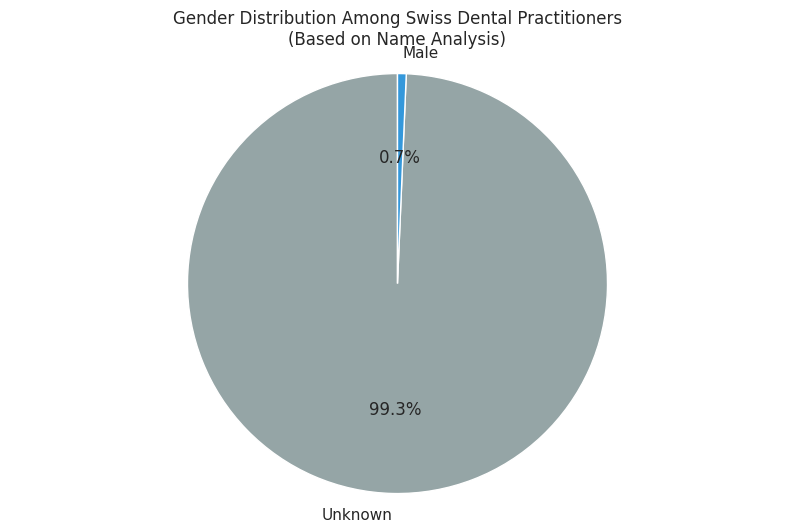


Gender distribution by canton (top 10):


,Canton,Total,Male,Female,Male %,Female %
0,ZH,720,4,0,0.555556,0.0
1,VD,264,2,0,0.757576,0.0
2,GE,219,1,0,0.456621,0.0
3,AG,200,2,0,1.000000,0.0
4,SG,194,1,0,0.515464,0.0
5,TI,181,1,0,0.552486,0.0
6,LU,178,0,0,0.000000,0.0
7,BS,116,2,0,1.724138,0.0
8,BL,114,0,0,0.000000,0.0
9,SO,112,1,0,0.892857,0.0


In [11]:
# Gender analysis based on name patterns and titles
import re

def analyze_gender(name):
    """
    Analyze gender based on German/Swiss naming patterns and titles
    """
    name_lower = name.lower()
    
    # Check for explicit gender indicators in titles/specialty
    if any(word in name_lower for word in ['zahnärztin', 'fachärztin', 'ärztin']):
        return 'Female'
    elif any(word in name_lower for word in ['zahnarzt', 'facharzt', 'arzt']) and 'ärztin' not in name_lower:
        return 'Male'
    
    # Common German female name endings and patterns
    female_patterns = [
        r'\b\w*a\b',  # Names ending in 'a'
        r'\b\w*e\b',  # Names ending in 'e' (but check context)
        r'\b\w*ina\b', r'\b\w*ine\b', r'\b\w*elle\b'
    ]
    
    # Common German/Swiss female first names
    female_names = [
        'anna', 'maria', 'petra', 'andrea', 'claudia', 'sabina', 'daniela',
        'barbara', 'christina', 'sandra', 'nicole', 'stephanie', 'julia',
        'katarina', 'katharina', 'elisabeth', 'ursula', 'brigitte', 'monika',
        'astrid', 'linda', 'sarah', 'meret', 'cécile', 'céline'
    ]
    
    # Common German/Swiss male first names
    male_names = [
        'thomas', 'andreas', 'michael', 'christian', 'stefan', 'martin',
        'peter', 'daniel', 'markus', 'david', 'patrick', 'alexander',
        'marcel', 'nicolas', 'simon', 'philippe', 'olivier', 'marc',
        'beat', 'reto', 'urs', 'hans', 'werner', 'rudolf'
    ]
    
    # Extract first name (usually after titles like Dr., Prof., etc.)
    name_parts = re.split(r'[,\s]+', name)
    first_name = None
    
    for part in name_parts:
        part_clean = re.sub(r'[^a-zA-ZäöüÄÖÜ]', '', part).lower()
        if part_clean and len(part_clean) > 2 and not any(title in part_clean for title in ['dr', 'prof', 'med', 'dent', 'eidg', 'dipl']):
            first_name = part_clean
            break
    
    if first_name:
        if first_name in female_names:
            return 'Female'
        elif first_name in male_names:
            return 'Male'
    
    return 'Unknown'

# Apply gender analysis
df['Gender'] = df['Name'].apply(analyze_gender)

# Count genders
gender_counts = df['Gender'].value_counts()
print("Gender Distribution Analysis:")
for gender, count in gender_counts.items():
    percentage = (count / total_practices * 100) if total_practices > 0 else 0
    print(f"{gender}: {count:,} practices ({percentage:.1f}%)")

# Visualize gender distribution
plt.figure(figsize=(10, 6))
colors = {'Male': '#3498db', 'Female': '#e74c3c', 'Unknown': '#95a5a6'}
gender_colors = [colors.get(gender, '#95a5a6') for gender in gender_counts.index]

plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=gender_colors, startangle=90)
plt.title('Gender Distribution Among Swiss Dental Practitioners\n(Based on Name Analysis)')
plt.axis('equal')
plt.show()

# Gender distribution by canton (top 10 cantons)
print("\nGender distribution by canton (top 10):")
gender_by_canton = []

for canton in top_cantons:
    canton_practices = df[df['Canton'] == canton]
    total_in_canton = len(canton_practices)
    male_count = (canton_practices['Gender'] == 'Male').sum()
    female_count = (canton_practices['Gender'] == 'Female').sum()
    unknown_count = (canton_practices['Gender'] == 'Unknown').sum()
    
    gender_by_canton.append({
        'Canton': canton,
        'Total': total_in_canton,
        'Male': male_count,
        'Female': female_count,
        'Unknown': unknown_count,
        'Male %': (male_count / total_in_canton * 100) if total_in_canton > 0 else 0,
        'Female %': (female_count / total_in_canton * 100) if total_in_canton > 0 else 0
    })

gender_canton_df = pd.DataFrame(gender_by_canton)
display(gender_canton_df[['Canton', 'Total', 'Male', 'Female', 'Male %', 'Female %']])

## 8. Geographic Distribution - Swiss Map Visualization

In [12]:
# Swiss map visualization
import folium
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Create a choropleth map of practices by canton
canton_counts = df['Canton'].value_counts().reset_index()
canton_counts.columns = ['Canton', 'Count']

# Swiss canton coordinates for center points (approximate)
swiss_cantons_coords = {
    'ZH': {'lat': 47.4245, 'lon': 8.5692, 'name': 'Zürich'},
    'BE': {'lat': 46.9513, 'lon': 7.4383, 'name': 'Bern'},
    'LU': {'lat': 47.0502, 'lon': 8.3093, 'name': 'Luzern'},
    'UR': {'lat': 46.8755, 'lon': 8.6344, 'name': 'Uri'},
    'SZ': {'lat': 47.0266, 'lon': 8.6476, 'name': 'Schwyz'},
    'OW': {'lat': 46.8979, 'lon': 8.2319, 'name': 'Obwalden'},
    'NW': {'lat': 46.9261, 'lon': 8.3844, 'name': 'Nidwalden'},
    'GL': {'lat': 47.0408, 'lon': 9.0658, 'name': 'Glarus'},
    'ZG': {'lat': 47.1741, 'lon': 8.5158, 'name': 'Zug'},
    'FR': {'lat': 46.7985, 'lon': 7.1536, 'name': 'Fribourg'},
    'SO': {'lat': 47.2076, 'lon': 7.5342, 'name': 'Solothurn'},
    'BS': {'lat': 47.5596, 'lon': 7.5886, 'name': 'Basel-Stadt'},
    'BL': {'lat': 47.4814, 'lon': 7.7335, 'name': 'Basel-Landschaft'},
    'SH': {'lat': 47.6968, 'lon': 8.6355, 'name': 'Schaffhausen'},
    'AR': {'lat': 47.3660, 'lon': 9.3608, 'name': 'Appenzell Ausserrhoden'},
    'AI': {'lat': 47.3317, 'lon': 9.4064, 'name': 'Appenzell Innerrhoden'},
    'SG': {'lat': 47.4312, 'lon': 9.3763, 'name': 'St. Gallen'},
    'GR': {'lat': 46.6568, 'lon': 9.5780, 'name': 'Graubünden'},
    'AG': {'lat': 47.4031, 'lon': 8.0498, 'name': 'Aargau'},
    'TG': {'lat': 47.5665, 'lon': 9.0765, 'name': 'Thurgau'},
    'TI': {'lat': 46.3317, 'lon': 8.7963, 'name': 'Ticino'},
    'VD': {'lat': 46.5527, 'lon': 6.6593, 'name': 'Vaud'},
    'VS': {'lat': 46.2339, 'lon': 7.3608, 'name': 'Valais'},
    'NE': {'lat': 47.0004, 'lon': 6.9294, 'name': 'Neuchâtel'},
    'GE': {'lat': 46.2044, 'lon': 6.1436, 'name': 'Geneva'},
    'JU': {'lat': 47.3515, 'lon': 7.1564, 'name': 'Jura'}
}

# Create Folium map centered on Switzerland
switzerland_center = [46.8182, 8.2275]
m = folium.Map(location=switzerland_center, zoom_start=8, tiles='OpenStreetMap')

# Add markers for each canton with practice counts
max_count = canton_counts['Count'].max()

for _, row in canton_counts.iterrows():
    canton = row['Canton']
    count = row['Count']
    
    if canton in swiss_cantons_coords:
        coord_info = swiss_cantons_coords[canton]
        # Scale marker size based on practice count
        marker_size = max(10, min(50, (count / max_count) * 50))
        
        folium.CircleMarker(
            location=[coord_info['lat'], coord_info['lon']],
            radius=marker_size,
            popup=f"{coord_info['name']}: {count:,} practices",
            tooltip=f"{coord_info['name']}: {count:,} practices",
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.6
        ).add_to(m)

# Display the map directly in the notebook
print("Interactive Swiss Dental Practices Map:")
display(m)

# Create a summary table of geographic distribution
print(f"\nGeographic Distribution Summary:")
print(f"Total cantons represented: {len(canton_counts)}")
print(f"Most practices in: {canton_counts.iloc[0]['Canton']} ({canton_counts.iloc[0]['Count']:,} practices)")
print(f"Least practices in: {canton_counts.iloc[-1]['Canton']} ({canton_counts.iloc[-1]['Count']:,} practices)")

# Show top 10 cantons
print(f"\nTop 10 Cantons by Practice Count:")
display(canton_counts.head(10))

Interactive map saved as: swiss_practices_map.html
Open this file in a web browser to view the interactive map.

Geographic Distribution Summary:
Total cantons represented: 22
Most practices in: ZH (720 practices)
Least practices in: GL (12 practices)

Top 10 Cantons by Practice Count:


,Canton,Count
0,ZH,720
1,VD,264
2,GE,219
3,AG,200
4,SG,194
5,TI,181
6,LU,178
7,BS,116
8,BL,114
9,SO,112


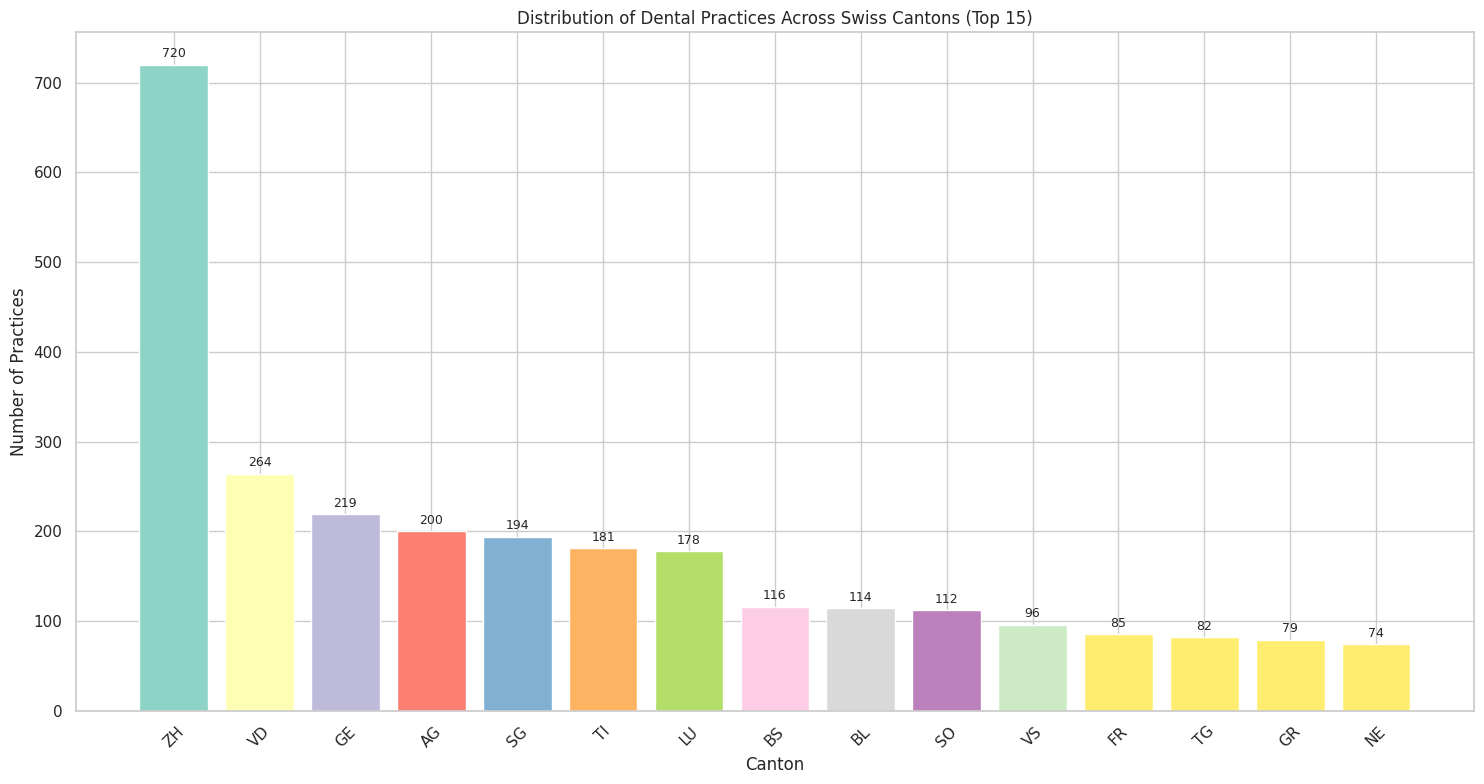

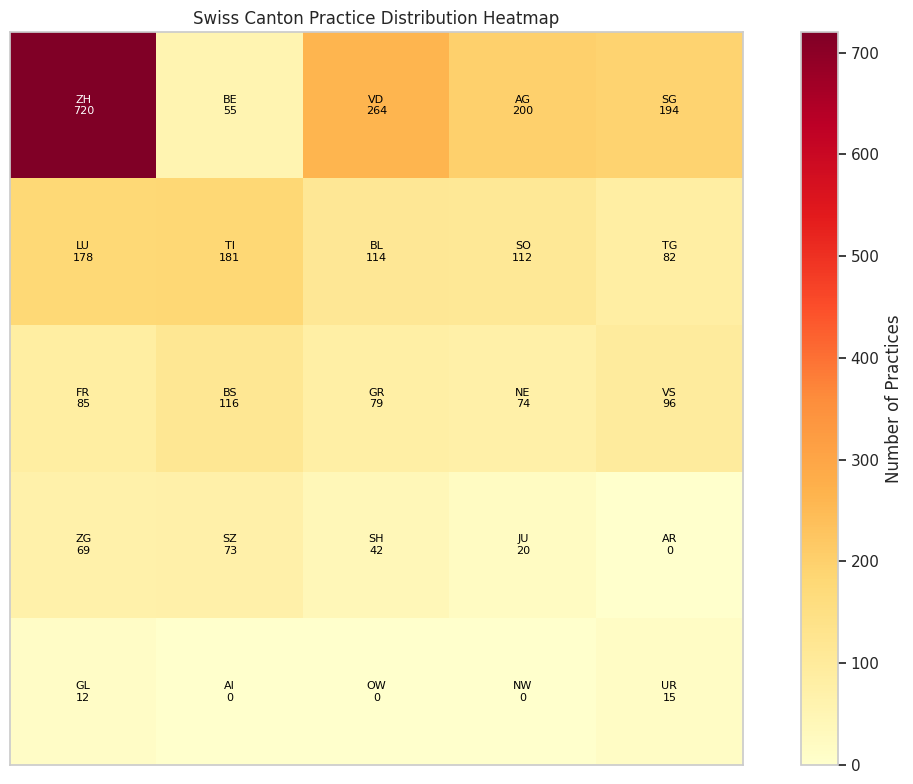

In [13]:
# Alternative visualization using plotly (static map)
# Create a bar chart showing practice distribution by canton
plt.figure(figsize=(15, 8))
top_15_cantons = canton_counts.head(15)

bars = plt.bar(range(len(top_15_cantons)), top_15_cantons['Count'], 
               color=plt.cm.Set3(range(len(top_15_cantons))))
plt.xlabel('Canton')
plt.ylabel('Number of Practices')
plt.title('Distribution of Dental Practices Across Swiss Cantons (Top 15)')
plt.xticks(range(len(top_15_cantons)), top_15_cantons['Canton'], rotation=45)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, top_15_cantons['Count'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Create a heatmap-style visualization
plt.figure(figsize=(12, 8))
canton_matrix = canton_counts.set_index('Canton')['Count'].reindex(
    ['ZH', 'BE', 'VD', 'AG', 'SG', 'LU', 'TI', 'BL', 'SO', 'TG', 'FR', 'BS', 'GR', 'NE', 'VS', 'ZG', 'SZ', 'SH', 'JU', 'AR', 'GL', 'AI', 'OW', 'NW', 'UR']
).fillna(0)

# Reshape for heatmap (5x5 grid)
import numpy as np
matrix_size = 5
canton_grid = np.zeros((matrix_size, matrix_size))
canton_labels = np.full((matrix_size, matrix_size), '', dtype=object)

for i, (canton, count) in enumerate(canton_matrix.items()):
    if i < matrix_size * matrix_size:
        row, col = i // matrix_size, i % matrix_size
        canton_grid[row, col] = count
        canton_labels[row, col] = f'{canton}\n{int(count):,}'

plt.imshow(canton_grid, cmap='YlOrRd', aspect='equal')
plt.colorbar(label='Number of Practices')
plt.title('Swiss Canton Practice Distribution Heatmap')

# Add text annotations
for i in range(matrix_size):
    for j in range(matrix_size):
        if canton_labels[i, j]:
            plt.text(j, i, canton_labels[i, j], ha='center', va='center', 
                    fontsize=8, color='black' if canton_grid[i, j] < canton_grid.max()/2 else 'white')

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()